<a href="https://colab.research.google.com/github/zihadul-haque/ML/blob/main/Human_activity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
train=pd.read_csv('/content/train-1.csv')
test=pd.read_csv('/content/test.csv')

In [11]:
train.shape,test.shape

((1438, 563), (1438, 563))

In [12]:
test.shape

(1438, 563)

In [13]:
train['Data']='Train'
test['Data'] = 'Test'

both=pd.concat([train,test],axis=0).reset_index(drop=True)
both['subject']='#' + both['subject'].astype(str)

In [14]:
train.shape,test.shape

((1438, 564), (1438, 564))

In [15]:
both.shape

(2876, 564)

In [16]:
both.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,#1.0,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,#1.0,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,#1.0,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,#1.0,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,#1.0,STANDING,Train


In [17]:
both.dtypes.value_counts()

float64    561
object       3
dtype: int64

In [20]:
def basic_details(df):
  b=pd.DataFrame()
  b['Missing_value']=df.isnull().sum()
  b['N unique value']=df.nunique()
  b['dtype']=df.dtypes
  return b


In [21]:
basic_details(both)

,Missing_value,N unique value,dtype
tBodyAcc-mean()-X,0,2876,float64
tBodyAcc-mean()-Y,0,2876,float64
tBodyAcc-mean()-Z,0,2876,float64
tBodyAcc-std()-X,0,2876,float64
tBodyAcc-std()-Y,0,2876,float64
...,...,...,...
"angle(Y,gravityMean)",2,2874,float64
"angle(Z,gravityMean)",2,2874,float64
subject,0,11,object
Activity,2,6,object


In [33]:
both.dropna(inplace=True)

In [34]:
both.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Data                    0
Length: 564, dtype: int64

in subject,Activity and Data fild , unique value is low.So bar chart will helpful.

<BarContainer object of 6 artists>

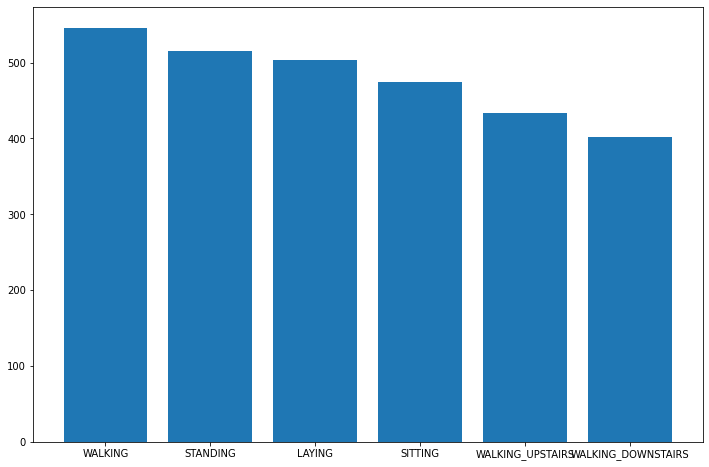

In [39]:
activity=both['Activity']
label_counts=both['Activity'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(label_counts.index,label_counts)

Index(['WALKING', 'STANDING', 'LAYING', 'SITTING', 'WALKING_UPSTAIRS',
       'WALKING_DOWNSTAIRS'],
      dtype='object')

In [40]:
Data=both['Data']
Subject = both['subject']
train =both.copy()
train = train.drop(['Data','subject','Activity'],axis=1)

# Scale the data

In [41]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
slc= StandardScaler()
train = slc.fit_transform(train)

# dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9,random_state=0)
train=pca.fit_transform(train)

In [42]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,activity,test_size=0.2,random_state=0)

# Test option and evaluation metric

In [43]:
num_folds =10
seed = 0 
scoring = 'accuracy'
results ={}
accuracy ={}

In [46]:
# Activity Recognition Algorithm
# Finalizing the model and comapring the test, predict resu
from sklearn. neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score 
model = KNeighborsClassifier(algorithm='auto',n_neighbors=8,p=1, weights = 'distance')
_ = cross_val_score(model, X_train,y_train,cv=10 , scoring=scoring)
results['GScv']=(_.mean(),_.std())

                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       109
           SITTING       0.94      0.93      0.93        97
          STANDING       0.93      0.94      0.93        98
           WALKING       0.98      0.98      0.98       121
WALKING_DOWNSTAIRS       0.97      0.95      0.96        79
  WALKING_UPSTAIRS       0.95      1.00      0.97        71

          accuracy                           0.96       575
         macro avg       0.96      0.96      0.96       575
      weighted avg       0.96      0.96      0.96       575



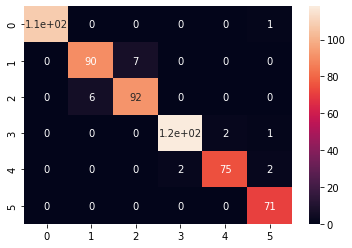

In [48]:
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

accuracy["GScv"]=accuracy_score(y_test,y_predict)

print(classification_report(y_test,y_predict))
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)